In [ ]:
import pandas as pd
import loader as load
# aak_ge = load.loadGEWithClinical()

In [ ]:
import processor as pr

tcma_cancer_type = ["COAD", "ESCA", "HNSC", "READ", "STAD"]

data = [load.loadTCMA("genus"), load.loadTCMA("phylum"), aak_ge, load.loadGEOverlappingTCMA("genus"), load.loadGEOverlappingTCMA("phylum")]
source_types = ["GENUS", "PHYLUM", "GE", "GENUS n GE", "PHYLUM n GE"]
file_names = ["TCMA_Genus", "TCMA_Phylum", "TCGA_GE(Aakash)", "TCMA_Genus_GE(Aakash)_Overlap", "TCMA_Phylum_GE(Aakash)_Overlap"]
reduction_type = "TSNE"
for i, b in enumerate(data):
    X, Y, titles = [], [], []
    b = load.attachTumorStatus(b)
    for c in tcma_cancer_type:
        x, y = pr.splitData(b, "tumor", project=c)
        if reduction_type == "PCA":
            X.append(pr.getPCA(x))
        else:
            X.append(pr.getTSNE(x))
        Y.append(y)
        titles.append(f"{c} {source_types[i]} {reduction_type}")
    pr.plotScatter(X, Y, titles, f"Visual/{reduction_type}/{file_names[i]}")


In [ ]:
target = "stage"
file = "aak_ge"
aak_ge = pd.read_csv(fr"Data\Descriptor\Prediction_Tables\{target}\{file}_pred.csv", index_col=None)
aak_ge.head(5)

0    f1-score cancer  p
0  0.315519   COAD  0
3  0.245685   ESCA  0
6  0.210941   HNSC  0
9  0.410935   STAD  0
5     f1-score cancer  p
1   0.272140   COAD  5
4   0.250513   ESCA  5
7   0.176321   HNSC  5
10  0.226347   STAD  5
10     f1-score cancer   p
2   0.409844   COAD  10
5   0.281588   ESCA  10
8   0.210192   HNSC  10
11  0.356714   STAD  10


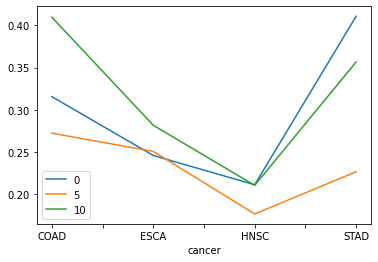

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

metric = "f1-score"
d = aak_ge[[metric, "cancer", "p"]]
for key, g, in d.groupby(["p"]):
    print(key, g)
    ax = g.plot(kind="line", x="cancer", y=metric, ax=ax, label=key)
# d.plot(kind="line", y="precision", ax=ax)